# ECE 590, Fall 2019 
## Problem Set 1 
* ### __Important :__  You are only allowed to use the Python built in function for generating uniform random variables.

## Full name: Lidia Azucena Morales Vasquez

### Problem 1 (Exponential distribution)

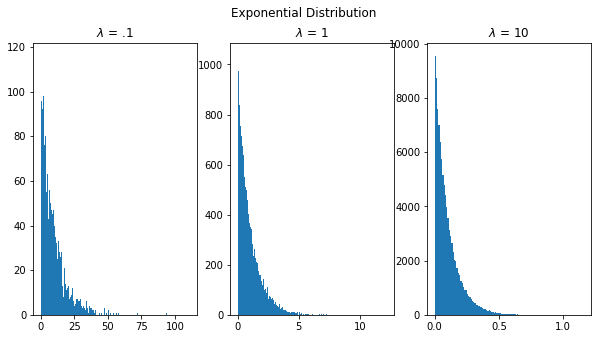

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def exponential(l):
    """ Generates a Exponential sample number from a Uniform distribution"""
    import random
    import math
    u = random.uniform(0,1)
    return -math.log(1-u)*1/l

def sample_exp(number, lambdas):
    """Generates a vector of some distributions"""
    import numpy as np
    return np.array([[exponential(l) for i in range(number)] for l in lambdas])

## Samples of exponentials
samples_exponential = sample_exp(10**5,[.1,1,10])

## Plot of samples
fig, axarr = plt.subplots(1, 3, figsize = (10,5))
fig.suptitle("Exponential Distribution", fontsize=12)

axarr[0].set_title('$\lambda$ = .1')
bins = np.arange(min(samples_exponential[0]), max(samples_exponential[0]) + .01, .01)
axarr[0].hist(samples_exponential[0], bins = bins)

axarr[1].set_title('$\lambda$ = 1')
bins = np.arange(min(samples_exponential[1]), max(samples_exponential[1]) + .01, .01)
axarr[1].hist(samples_exponential[1], bins = bins)

axarr[2].set_title('$\lambda$ = 10')
bins = np.arange(min(samples_exponential[2]), max(samples_exponential[2]) + .01, .01)
axarr[2].hist(samples_exponential[2], bins = bins)

plt.show()

### Problem 2 (Gamma distribution)

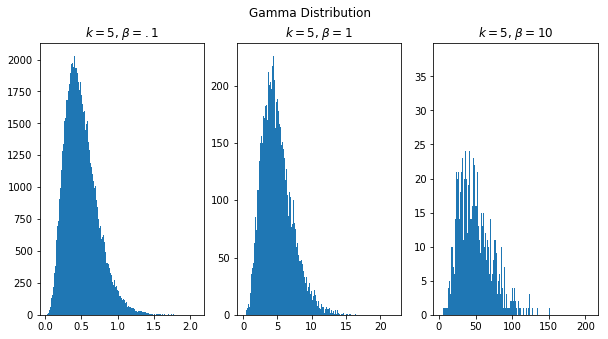

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def gamma(k,b):
    """ Generates a Gammal sample number from a exponential distribution"""
    import random
    import math
    return sum([exponential(1/b) for ki in range(k)])

def sample_gamma(number,ks,betas):
    """Generates a vector of some distributions"""
    import numpy as np
    return np.array([[gamma(k,b) for i in range(number)] for k,b in zip(ks,betas)])

## Samples of gammas
samples_gamma = sample_gamma(10**5,[5,5,5],[.1,1,10])

## Plot of samples
fig, axarr = plt.subplots(1, 3, figsize = (10,5))
fig.suptitle("Gamma Distribution", fontsize=12)

axarr[0].set_title(r'$k = 5$, $\beta = .1$')
bins = np.arange(min(samples_gamma[0]), max(samples_gamma[0]) + .01, .01)
axarr[0].hist(samples_gamma[0], bins = bins)

axarr[1].set_title(r'$k = 5$, $\beta = 1$')
bins = np.arange(min(samples_gamma[1]), max(samples_gamma[1]) + .01, .01)
axarr[1].hist(samples_gamma[1], bins = bins)

axarr[2].set_title(r'$k = 5$, $\beta = 10$')
bins = np.arange(min(samples_gamma[2]), max(samples_gamma[2]) + .01, .01)
axarr[2].hist(samples_gamma[2], bins = bins)
plt.show()

### Problem 3 (Beta distribution)

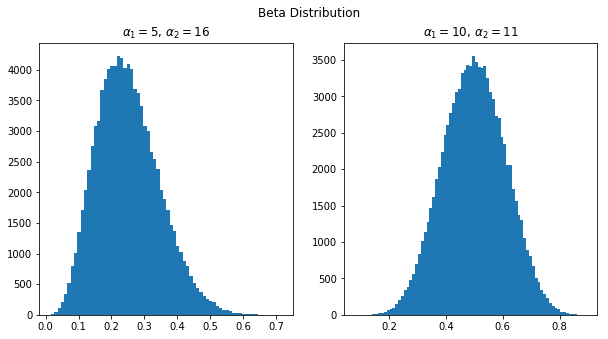

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def beta(a,b):
    """ Generates a Beta sample number from a Uniform distribution"""
    import random
    n = b + a - 1
    k = a
    u = [random.uniform(0,1) for i in range(1,n)]
    beta = sorted(u)[k-1]
    return beta

def sample_beta(number,alphas,betas):
    """Generates a vector of some distributions"""
    import numpy as np
    return np.array([[beta(a,b) for i in range(number)] for a,b in zip(alphas,betas)])

## Samples of betas
samples_beta = sample_beta(10**5,[5,10],[16,11])

## Plot of samples
fig, axarr = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle("Beta Distribution", fontsize=12)

axarr[0].set_title(r'$\alpha_1 = 5$, $\alpha_2 = 16$')
bins = np.arange(min(samples_beta[0]), max(samples_beta[0]) + .01, .01)
axarr[0].hist(samples_beta[0], bins = bins)

axarr[1].set_title(r'$\alpha_1 = 10$, $\alpha_2 = 11$')
bins = np.arange(min(samples_beta[1]), max(samples_beta[1]) + .01, .01)
axarr[1].hist(samples_beta[1], bins = bins)

plt.show()

### Problem 4 (Dirichlet distribution)

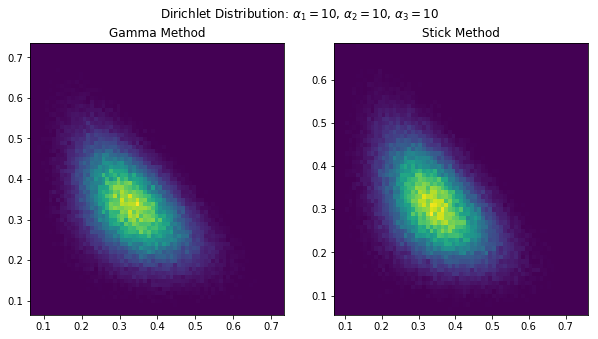

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def dirichlet(alphas):
    """ Generates a Dirichlet sample number from a Gamma distribution"""
    import numpy as np
    y = [gamma(ai,5) for ai in alphas]
    return [yi/sum(y) for yi in y]

def dirichlet_2(alphas):
    """ Generates a Dirichlet sample number using the stick method"""
    import numpy as np
    x = [beta(ai,sum(alphas[(k+1):])) for k,ai in enumerate(alphas[:-1])]
    diff = [1-xi for xi in x]
    y = [xi*np.prod(diff[:k]) for k,xi in enumerate(x[:-1])]
    y.append(np.prod(diff))
    return y
              
def sample_dirichlet(number, alphas, dfunction):
    """Generates a vector of some distributions"""
    import numpy as np
    return np.array([dfunction(alphas) for i in range(number)])

## Samples of exponentials
sample_dirichlet_gamma = sample_dirichlet(10**5,[10,10,10],dirichlet)
sample_dirichlet_stick = sample_dirichlet(10**5,[10,10,10],dirichlet_2)

## Plot of samples
fig, axarr = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle(r"Dirichlet Distribution: $\alpha_1 = 10$, $\alpha_2 = 10$, $\alpha_3 = 10$", fontsize=12)

axarr[0].set_title(r'Gamma Method')
x = np.arange(min(sample_dirichlet_gamma[:,0]), max(sample_dirichlet_gamma[:,0]) + .01, .01)
y = np.arange(min(sample_dirichlet_gamma[:,1]), max(sample_dirichlet_gamma[:,1]) + .01, .01) 
axarr[0].hist2d(sample_dirichlet_gamma[:,0],sample_dirichlet_gamma[:,1], bins = [x,y])

axarr[1].set_title(r'Stick Method')
x = np.arange(min(sample_dirichlet_stick[:,0]), max(sample_dirichlet_stick[:,0]) + .01, .01)
y = np.arange(min(sample_dirichlet_stick[:,1]), max(sample_dirichlet_stick[:,1]) + .01, .01)
axarr[1].hist2d(sample_dirichlet_stick[:,0],sample_dirichlet_stick[:,1], bins = [x,y])
plt.show()